we verify if the uncertainty points selected by active learning strategy is indeed lying on decision boundary
least confidence strategy

In [1]:
from deepvisualinsight.MMS import MMS
from deepvisualinsight import utils
import sys
import os
import numpy as np
import time
import matplotlib.pyplot as plt
import torch
import json
import tensorflow as tf

In [2]:
content_path = "E:\\DVI_exp_data\\active_learning\\baseline\\LL4AL\\resnet18\\CIFAR10"
sys.path.append(content_path)

from Model.model import *
net = ResNet18()
classes = ("airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

mms = MMS(content_path, net, 1, 10, 1, 512, 10, classes, cmap="tab10", resolution=400, neurons=256,
          verbose=1, temporal=False, split=-1, advance_border_gen=True, attack_device="cuda:0")

Finish loading content!


In [3]:
# hyperparameters
EPOCH = 5

In [4]:
# 1. whether selected points lie on boundary?
new_index_file = os.path.join(mms.model_path, "Epoch_{:d}".format(EPOCH+1), "index.json")
new_index = utils.load_labelled_data_index(new_index_file)

training_data = mms.training_data
train_data = mms.get_representation_data(EPOCH, training_data)

index_file = os.path.join(mms.model_path, "Epoch_{:d}".format(EPOCH), "index.json")
index = utils.load_labelled_data_index(index_file)
l = []
for j in range(len(new_index)):
    if new_index[j] not in index:
        l.append(j)

preds = mms.get_pred(EPOCH, train_data[l])
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

100%|██████████| 5/5 [00:00<00:00, 22.38it/s]


In [5]:
border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1

# how many of them lie on boundary
s = np.sum(border)
s

46

In [18]:
# 2. if point lies on boundary, is the background white?
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = train_data[l][border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.5] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.5] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.5] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000027001F2FB38>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000026E8C355C88>


100%|██████████| 800/800 [00:00<00:00, 5570.44it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000026E8C34A390>


(41, 46, 0.8913043478260869)

Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000026F8CC91B00>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000026F8CC917B8>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000027020634F98>


100%|██████████| 800/800 [00:00<00:00, 5729.58it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000026F8CC91B00>


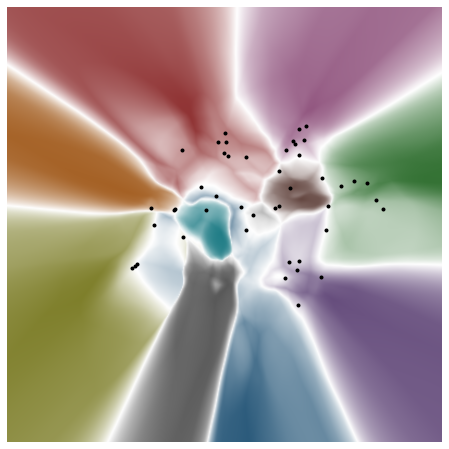

In [17]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, target_samples, None, None, None,
                        os.path.join(img_save_location, "RQ_1_{:d}".format(EPOCH)), np.arange(-len(c), 0, 1))

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1000: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002700FB54AC8>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002700FB547F0>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000027019646F98>


100%|██████████| 800/800 [00:00<00:00, 5729.00it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000027013981748>


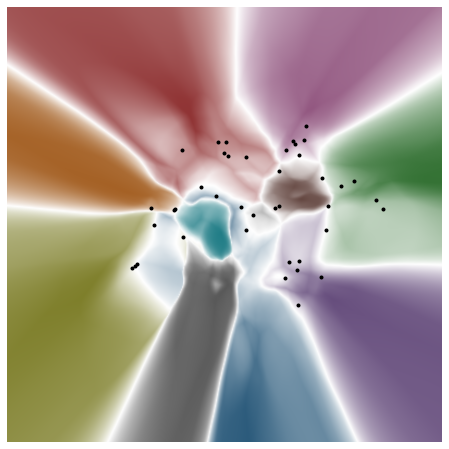

In [19]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, target_samples[c], None, None, None,
                        os.path.join(img_save_location, "RQ_2_{:d}".format(EPOCH)), np.arange(-np.sum(c), 0, 1))